In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib as pyplt

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing

In [6]:
data = pd.read_csv('cardetails.csv')
data



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [8]:
data.shape

(4340, 8)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [12]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [14]:


data.isna().sum()



name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [18]:


data["year"]



0       2007
1       2007
2       2012
3       2017
4       2014
        ... 
4335    2014
4336    2014
4337    2009
4338    2016
4339    2016
Name: year, Length: 4340, dtype: int64

In [20]:


np.max(data["year"])



2020

In [22]:


data["age"] = 2021 - data["year"]



In [24]:


data



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,14
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,14
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,9
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,4
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,7
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,7
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,7
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,12
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,5


In [26]:


data.drop("year" , axis = 1 , inplace = True)
data



,name,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,14
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,14
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,9
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,4
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,7
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,80000,Diesel,Individual,Manual,Second Owner,7
4336,Hyundai i20 Magna 1.4 CRDi,409999,80000,Diesel,Individual,Manual,Second Owner,7
4337,Maruti 800 AC BSIII,110000,83000,Petrol,Individual,Manual,Second Owner,12
4338,Hyundai Creta 1.6 CRDi SX Option,865000,90000,Diesel,Individual,Manual,First Owner,5


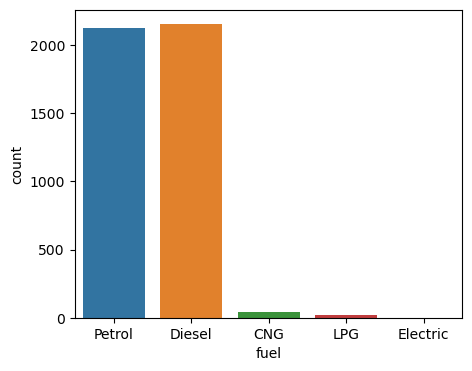

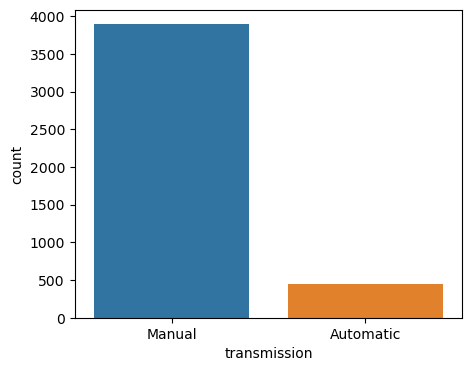

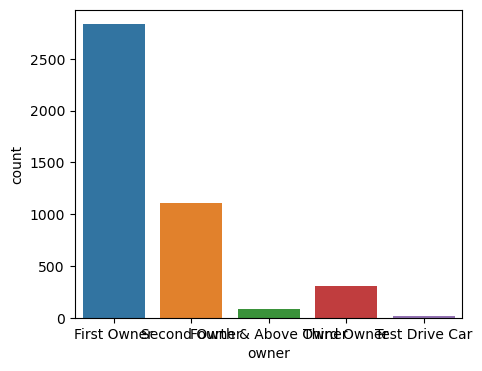

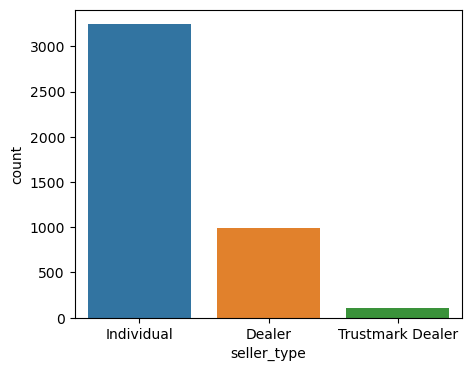

In [34]:


columns = ["fuel","transmission","owner","seller_type"]
for i in columns:
    fig = plt.figure(figsize =[5,4])
    sns.countplot(x=i, data=data)
    plt.xlabel(i)
    plt.show()



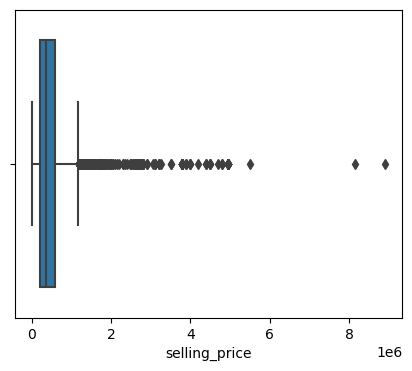

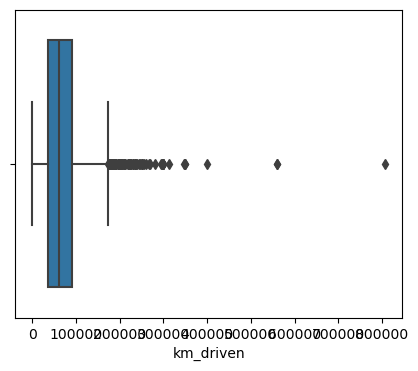

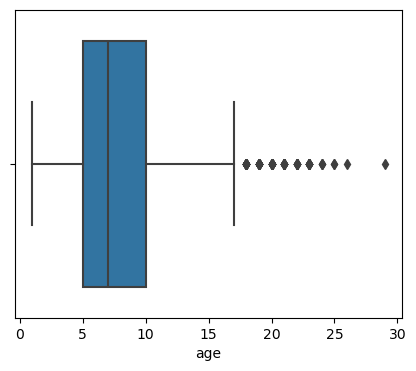

In [36]:
columns = ["selling_price","km_driven","age"]
for i in columns:
    fig = plt.figure(figsize =[5,4])
    sns.boxplot(x=i, data=data)
    plt.xlabel(i)
    plt.show()

In [38]:


numeric_data = data.select_dtypes(include=["number"])
numeric_data 

,selling_price,km_driven,age
0,60000,70000,14
1,135000,50000,14
2,600000,100000,9
3,250000,46000,4
4,450000,141000,7
...,...,...,...
4335,409999,80000,7
4336,409999,80000,7
4337,110000,83000,12
4338,865000,90000,5


In [40]:


numeric_data.corr()



,selling_price,km_driven,age
selling_price,1.000000,-0.192289,-0.413922
km_driven,-0.192289,1.000000,0.419688
age,-0.413922,0.419688,1.000000


In [44]:
data.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,14
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,14
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,9
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,4
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,7


In [46]:
print(pd.unique(data["fuel"]))
print(pd.unique(data["seller_type"]))
print(pd.unique(data["transmission"]))
print(pd.unique(data["owner"]))

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [48]:
data["fuel"].replace({"Petrol":2 , "Diesel":3 , "CNG":4, "LPG":5, "Electric":6} , inplace=True)
data["seller_type"].replace({"Dealer":2 , "Individual":3, "Trustmark Dealer": 4} , inplace=True)
data["transmission"].replace({"Manual":2 , "Automatic":3 } , inplace=True)
data["owner"].replace({"First Owner":2 , "Second Owner":3, "Fourth & Above Owner": 4, "Third Owner": 5, "Test Drive Car": 6 } , inplace=True)
data



,name,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,Maruti 800 AC,60000,70000,2,3,2,2,14
1,Maruti Wagon R LXI Minor,135000,50000,2,3,2,2,14
2,Hyundai Verna 1.6 SX,600000,100000,3,3,2,2,9
3,Datsun RediGO T Option,250000,46000,2,3,2,2,4
4,Honda Amaze VX i-DTEC,450000,141000,3,3,2,3,7
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),409999,80000,3,3,2,3,7
4336,Hyundai i20 Magna 1.4 CRDi,409999,80000,3,3,2,3,7
4337,Maruti 800 AC BSIII,110000,83000,2,3,2,3,12
4338,Hyundai Creta 1.6 CRDi SX Option,865000,90000,3,3,2,2,5


In [50]:


data.drop(labels="name" , axis =1 , inplace = True)
data



,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,60000,70000,2,3,2,2,14
1,135000,50000,2,3,2,2,14
2,600000,100000,3,3,2,2,9
3,250000,46000,2,3,2,2,4
4,450000,141000,3,3,2,3,7
...,...,...,...,...,...,...,...
4335,409999,80000,3,3,2,3,7
4336,409999,80000,3,3,2,3,7
4337,110000,83000,2,3,2,3,12
4338,865000,90000,3,3,2,2,5


In [56]:


x = data.drop ("selling_price", axis =1)
y = data["selling_price"]


In [62]:


x_train,x_test ,y_train, y_test = train_test_split(x ,y,test_size = 0.2, random_state =1)
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)
print("y_train: ",y_train.shape)



x_train:  (3472, 6)
x_test:  (868, 6)
y_test:  (868,)
y_train:  (3472,)


In [64]:


Model = LinearRegression()
Model.fit (x_train, y_train)



LinearRegression()

In [66]:


y_pred = Model.predict(x_test)



In [68]:


print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: " ,np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score: ", metrics.r2_score(y_test,y_pred))



Mean Absolute Error:  223164.4386176717
Mean Squared Error:  158347924373.93216
Root Mean Squared Error:  397929.5469978727
R2 Score:  0.4769781628659806
